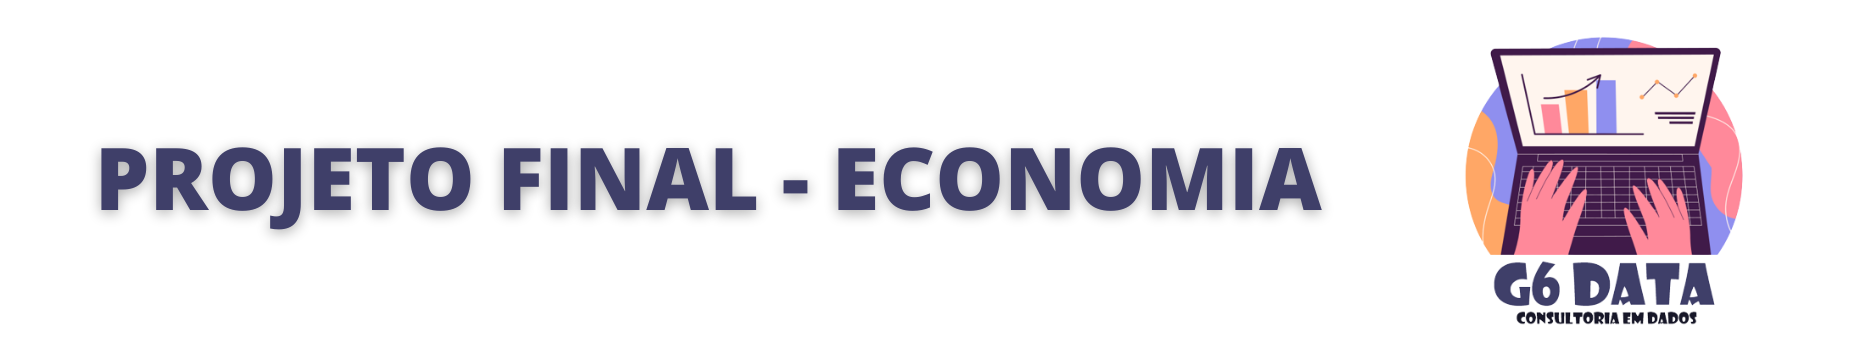

**Escola**: SoulCode Academy

**Curso**: Bootcamp Analista de Dados - Martech - AD2

**Período**: Semana 12

**Professores**: Franciane Rodrigues, Douglas Ribeiro e Jonathas Carneiro

**Alunos**: Angelo Maximo, Bianka Cristina, Bruno Nunes, Paulo Paulino, Samira Cavalcanti e Vagner Pereira

**Fonte**: https://www.kaggle.com/datasets/juliotorniero/brazilian-main-economic-indicators

**Periodo da base**: 2012 a 2022

**Periodo analisado**: 2017 a 2022 (antes e durante a pandemia de Covid-19 proporcionalmente, 3 anos antes e 3 anos de pandemia.)

### **Pergunta de Negocio**

Qual impacto da pandemia de Covid-19 na economia nacional?

### **Legenda dos Dados**


* `date`: Data dos dados da linha - dados mensais
* `econ_act`: atividade econômica (% var últimos 12 meses)
* `unemploy`: taxa de desemprego (% últimos 12 meses)
* `credit_cost`: custo do crédito (% ao ano)
* `ent_debt`: dívida das empresas (% var últimos 12 meses)
* `peo_debt`: dívida de pessoas (% var últimos 12 meses)
* `perm_ext_inv`: investimentos estrangeiros permanentes (% do PIB últimos 12 meses)
* `bal_comex`: transações correntes (% do PIB últimos 12 meses)
* `int_reserves`: Reservas internacionais brasileiras (em US$ bilhões)
* `nom_res`: resultado nominal (% do PIB últimos 12 meses)
* `prim_res`: resultado primário (% do PIB últimos 12 meses)
* `gross_debt_gov`: Dívida bruta do governo (% do PIB últimos 12 meses)
* `net_debt_gov`: Dívida líquida do governo (% do PIB)
* `int_inv_pos`: Posição de investimento internacional (% do PIB)
* `inflation`: Inflação (var % em 12 meses)
* `interest_rate`: Taxa de Juros (% por ano)
* `usd_brl`: (taxa de câmbio USD / BRL)

## **Definição dos Atributos**

* **Atividade Econômica**: Refere-se à medida da atividade econômica de um país, geralmente medida pelo PIB (Produto Interno Bruto), que é o valor total de todos os bens e serviços produzidos em um determinado período. A atividade econômica é um indicador importante para entender o crescimento e desenvolvimento de uma economia.

* **Taxa de Desemprego**: É a porcentagem da população ativa (que está em idade de trabalhar) que está desempregada e em busca de emprego. É um indicador crítico para avaliar o nível de saúde do mercado de trabalho de um país.

* **Custo do Crédito**: Refere-se à taxa de juros que os tomadores de empréstimos precisam pagar ao pegar dinheiro emprestado, seja para investir em projetos ou para consumo pessoal. O custo do crédito influencia o nível de investimento e consumo na economia.

* **Dívida das Empresas**: Representa o montante total de dívidas que as empresas de um país têm. Pode incluir dívidas bancárias, títulos de dívida e outras obrigações financeiras.

* **Dívida de Pessoas**: Refere-se ao montante total de dívidas que os indivíduos ou famílias de um país possuem, como empréstimos estudantis, hipotecas, cartões de crédito, etc.

* **Investimentos Estrangeiros Permanentes**: São investimentos feitos por estrangeiros em ativos de longo prazo, como aquisição de empresas, propriedades e participações em negócios em outro país.

* **Transações Correntes**: Representa a soma das exportações e importações de bens, serviços, rendas e transferências unilaterais entre um país e o resto do mundo durante um determinado período. É um indicador importante do equilíbrio econômico internacional.

* **Reservas Internacionais Brasileiras**: Refere-se ao volume de moeda estrangeira, como dólares americanos, mantido pelo banco central de um país para garantir a estabilidade financeira e apoiar a taxa de câmbio.

* **Resultado Nominal** É a diferença entre as receitas e despesas totais do governo, incluindo pagamentos de juros da dívida. Pode ser superavitário (receitas maiores que despesas) ou deficitário (despesas maiores que receitas).

* **Resultado Primário**: É o resultado nominal excluindo os pagamentos de juros da dívida. Ajuda a avaliar a capacidade do governo de financiar suas operações sem recorrer ao endividamento.

* **Dívida Bruta do Governo**: Representa o montante total de dívidas do governo, incluindo títulos de dívida e outras obrigações financeiras.

* **Dívida Líquida do Governo**: É a dívida bruta do governo subtraída das reservas internacionais. Isso dá uma ideia mais precisa da capacidade do governo de pagar suas obrigações.

* **Posição de Investimento Internacional**: Refere-se à posição financeira de um país em relação a investimentos em ativos no exterior e passivos de investidores estrangeiros em ativos domésticos.

* **Inflação**: Representa o aumento contínuo e generalizado dos preços de bens e serviços em uma economia ao longo do tempo. É um importante indicador econômico e afeta o poder de compra da moeda.

* **Taxa de Juros**: Refere-se à taxa pela qual o dinheiro é emprestado ou investido. Taxas de juros mais altas podem desencorajar o investimento e o consumo, enquanto taxas mais baixas podem estimular a atividade econômica.

* **Taxa de Câmbio USD/BRL**: Indica quanto uma unidade da moeda dos Estados Unidos (dólar americano, USD) vale em relação à moeda brasileira (real, BRL). Ela influencia o custo das importações, exportações e investimentos estrangeiros no país.

## **Instalação e importação das Bibliotecas**

In [ ]:
# Instalação das libs
!pip install pandera
!pip install gcsfs
!pip install -U matplotlib
!pip install seaborn
!pip install pymongo

In [ ]:
# Importando as libs
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import storage
from datetime import datetime
from pymongo import MongoClient
import warnings

## **Extração**

In [ ]:
# Configurando para que Warnings sejam ignorados
warnings.filterwarnings("ignore")

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/max-digital-63376-77a4986290c9.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('g6-data')
bucket.blob('brazil_economy_indicators.xlsx')
path = 'gs://g6-data/Bruto/economia_brasil/brazil_economy_indicators.xlsx'

In [ ]:
# Conector MongoDB
uri = "mongodb+srv://cluster0.tyruxgl.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri, tls=True, tlsCertificateKeyFile='/content/X509-cert-5417599201996271224.pem')

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_excel(path)

## **Pré-Análise**

In [ ]:
# Visualizando base
display(df)

,date,econ_act,unemploy,credit_cost,ent_debt,peo_debt,perm_ext_inv,bal_comex,int_reserves,nom_res,prim_res,gross_debt_gov,net_debt_gov,int_inv_pos,inflation,interest_rate,usd_brl
0,01/10/2012,1.03,7.0,NaN,NaN,NaN,3.65,-3.24,377.753,-2.50,2.07,54.52,32.44,-32.3,5.45,7.50,2.0260
1,01/11/2012,1.04,6.8,NaN,NaN,NaN,3.83,-3.31,378.560,-2.73,1.77,54.65,32.08,-32.3,5.53,7.25,2.0312
2,01/12/2012,0.90,6.9,NaN,NaN,NaN,3.76,-3.43,373.147,-2.26,2.18,53.67,32.19,-32.3,5.84,7.25,2.1050
3,01/01/2013,1.21,7.3,19.94,NaN,NaN,3.57,-3.47,373.417,-2.22,2.25,53.98,32.17,-33.9,6.15,7.25,2.0420
4,01/02/2013,1.31,7.8,19.98,7.56,3.8,3.48,-3.52,373.742,-2.50,1.98,54.03,32.59,-33.9,6.31,7.25,1.9843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,01/06/2022,2.18,9.3,20.50,29.75,4.8,3.67,-2.10,341.958,-4.23,2.17,78.02,57.82,NaN,11.89,12.75,4.7765
117,01/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.403,-3.83,2.48,77.61,57.34,-40.0,10.07,13.25,5.3142
118,01/08/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.20,56.50,-40.0,8.73,13.25,5.1606
119,01/09/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.17,13.75,5.2007


### **Verificação de Inconsistência**

In [ ]:
# Visualizando dados Não Nulos e seus respectivos Tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            121 non-null    object 
 1   econ_act        117 non-null    float64
 2   unemploy        117 non-null    float64
 3   credit_cost     114 non-null    float64
 4   ent_debt        113 non-null    float64
 5   peo_debt        113 non-null    float64
 6   perm_ext_inv    117 non-null    float64
 7   bal_comex       117 non-null    float64
 8   int_reserves    118 non-null    float64
 9   nom_res         118 non-null    float64
 10  prim_res        118 non-null    float64
 11  gross_debt_gov  119 non-null    float64
 12  net_debt_gov    119 non-null    float64
 13  int_inv_pos     118 non-null    float64
 14  inflation       121 non-null    float64
 15  interest_rate   121 non-null    float64
 16  usd_brl         121 non-null    float64
dtypes: float64(16), object(1)
memory us

In [ ]:
# Verificando dados nulos, ausente etc 1
df.isna().sum()

date              0
econ_act          4
unemploy          4
credit_cost       7
ent_debt          8
peo_debt          8
perm_ext_inv      4
bal_comex         4
int_reserves      3
nom_res           3
prim_res          3
gross_debt_gov    2
net_debt_gov      2
int_inv_pos       3
inflation         0
interest_rate     0
usd_brl           0
dtype: int64

In [ ]:
# Verificando dados nulos, ausente etc 2
df.isnull().sum()

date              0
econ_act          4
unemploy          4
credit_cost       7
ent_debt          8
peo_debt          8
perm_ext_inv      4
bal_comex         4
int_reserves      3
nom_res           3
prim_res          3
gross_debt_gov    2
net_debt_gov      2
int_inv_pos       3
inflation         0
interest_rate     0
usd_brl           0
dtype: int64

### **Backup 1 - Base Bruta**

In [ ]:
dfback1 = df.copy()

In [ ]:
# Carregamento do backup no MongoDB
db = client['finalprojectmongo']
collection = db['bruto']
collection.count_documents({})

2420

In [ ]:
# Contagem dos documentos
doc_count = collection.count_documents({})
print(doc_count)

2420


In [ ]:
# Conversão para colocar no MongoDB
df_mongo = df.to_dict("records")
collection.insert_many(df_mongo)

In [ ]:
# Checagem da coleção
for x in collection.find():
  print(x)

{'_id': ObjectId('64cbd9ad6ee2c7f204fe5511'), 'date': '01/10/2012', 'econ_act': 1.03, 'unemploy': 7.0, 'credit_cost': nan, 'ent_debt': nan, 'peo_debt': nan, 'perm_ext_inv': 3.65, 'bal_comex': -3.24, 'int_reserves': 377.753, 'nom_res': -2.5, 'prim_res': 2.07, 'gross_debt_gov': 54.52, 'net_debt_gov': 32.44, 'int_inv_pos': -32.3, 'inflation': 5.45, 'interest_rate': 7.5, 'usd_brl': 2.026}
{'_id': ObjectId('64cbd9ad6ee2c7f204fe5512'), 'date': '01/11/2012', 'econ_act': 1.04, 'unemploy': 6.8, 'credit_cost': nan, 'ent_debt': nan, 'peo_debt': nan, 'perm_ext_inv': 3.83, 'bal_comex': -3.31, 'int_reserves': 378.56, 'nom_res': -2.73, 'prim_res': 1.77, 'gross_debt_gov': 54.65, 'net_debt_gov': 32.08, 'int_inv_pos': -32.3, 'inflation': 5.53, 'interest_rate': 7.25, 'usd_brl': 2.0312}
{'_id': ObjectId('64cbd9ad6ee2c7f204fe5513'), 'date': '01/12/2012', 'econ_act': 0.9, 'unemploy': 6.9, 'credit_cost': nan, 'ent_debt': nan, 'peo_debt': nan, 'perm_ext_inv': 3.76, 'bal_comex': -3.43, 'int_reserves': 373.147,

## **Transformação**

In [ ]:
# Transformando o atributo Date para DateTime e no padrão Dia, Mês e Ano

# Convertendo a coluna 'date' para o formato datetime 'ano-dia-mês'
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
# Agora, formatamos a coluna 'date' no formato "dia/mês/ano"
df['date'] = df['date'].dt.strftime("%d/%m/%Y")
# Convertendo a coluna 'date' novamente para o tipo datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')


In [ ]:
display(df)

,date,econ_act,unemploy,credit_cost,ent_debt,peo_debt,perm_ext_inv,bal_comex,int_reserves,nom_res,prim_res,gross_debt_gov,net_debt_gov,int_inv_pos,inflation,interest_rate,usd_brl
0,2012-10-01,1.03,7.0,NaN,NaN,NaN,3.65,-3.24,377.753,-2.50,2.07,54.52,32.44,-32.3,5.45,7.50,2.0260
1,2012-11-01,1.04,6.8,NaN,NaN,NaN,3.83,-3.31,378.560,-2.73,1.77,54.65,32.08,-32.3,5.53,7.25,2.0312
2,2012-12-01,0.90,6.9,NaN,NaN,NaN,3.76,-3.43,373.147,-2.26,2.18,53.67,32.19,-32.3,5.84,7.25,2.1050
3,2013-01-01,1.21,7.3,19.94,NaN,NaN,3.57,-3.47,373.417,-2.22,2.25,53.98,32.17,-33.9,6.15,7.25,2.0420
4,2013-02-01,1.31,7.8,19.98,7.56,3.8,3.48,-3.52,373.742,-2.50,1.98,54.03,32.59,-33.9,6.31,7.25,1.9843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2022-06-01,2.18,9.3,20.50,29.75,4.8,3.67,-2.10,341.958,-4.23,2.17,78.02,57.82,NaN,11.89,12.75,4.7765
117,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.403,-3.83,2.48,77.61,57.34,-40.0,10.07,13.25,5.3142
118,2022-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.20,56.50,-40.0,8.73,13.25,5.1606
119,2022-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.17,13.75,5.2007


In [ ]:
# Verificando transformação
print(df.dtypes['date'])

datetime64[ns]


In [ ]:
# Removendo Nulos/Ausentes para normalização dos dados
df = df.dropna()

In [ ]:
# Renomeando atributos
df.rename(columns={'date': 'data',
                   'econ_act': 'ativ_econ',
                   'unemploy': 'taxa_desemprego',
                   'credit_cost': 'custo_cred',
                   'ent_debt': 'div_emp',
                   'peo_debt': 'div_pessoa',
                   'perm_ext_inv': 'invest_ext_perm',
                   'int_reserves': 'reservas_int',
                   'nom_res': 'result_nom',
                   'prim_res': 'result_prim',
                   'gross_debt_gov': 'div_bruta_gov',
                   'net_debt_gov': 'div_liq_gov',
                   'int_inv_pos': 'pos_invest_int',
                   'inflation': 'inflacao',
                   'interest_rate': 'taxa_juros',
                   'usd_brl': 'taxa_camb_usd_brl'},
           inplace=True
          )


### **Verificação de Normalização**

In [ ]:
# Verificando se houve a normalização corretamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 4 to 115
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   data               112 non-null    datetime64[ns]
 1   ativ_econ          112 non-null    float64       
 2   taxa_desemprego    112 non-null    float64       
 3   custo_cred         112 non-null    float64       
 4   div_emp            112 non-null    float64       
 5   div_pessoa         112 non-null    float64       
 6   invest_ext_perm    112 non-null    float64       
 7   bal_comex          112 non-null    float64       
 8   reservas_int       112 non-null    float64       
 9   result_nom         112 non-null    float64       
 10  result_prim        112 non-null    float64       
 11  div_bruta_gov      112 non-null    float64       
 12  div_liq_gov        112 non-null    float64       
 13  pos_invest_int     112 non-null    float64       
 14  inflacao  

In [ ]:
# Verificando dados nulos, ausente etc 1
df.isna().sum()

data                 0
ativ_econ            0
taxa_desemprego      0
custo_cred           0
div_emp              0
div_pessoa           0
invest_ext_perm      0
bal_comex            0
reservas_int         0
result_nom           0
result_prim          0
div_bruta_gov        0
div_liq_gov          0
pos_invest_int       0
inflacao             0
taxa_juros           0
taxa_camb_usd_brl    0
dtype: int64

In [ ]:
# Verificando dados nulos, ausente etc 2
df.isnull().sum()

data                 0
ativ_econ            0
taxa_desemprego      0
custo_cred           0
div_emp              0
div_pessoa           0
invest_ext_perm      0
bal_comex            0
reservas_int         0
result_nom           0
result_prim          0
div_bruta_gov        0
div_liq_gov          0
pos_invest_int       0
inflacao             0
taxa_juros           0
taxa_camb_usd_brl    0
dtype: int64

### **Backup 2 - Base Tratada**

In [ ]:
dfback2 = df.copy()

## **Validação de Dados - PySpark (Schema)**

In [ ]:
# Instalando os requisitos necessários
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
# Importando as ferramentas e criando o ambiente virtual para o spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
# Criando a sessão clusterizada do PySpark
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import regexp_replace
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Para deixar a visualição das tabelas mais amigável
spark

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.types import StructType,StructField,StringType,IntegerType,DoubleType # importando estrutura da tabela (structType)
schema = StructType([ \
    StructField('data', DateType(),False), \
    StructField('ativ_econ',DoubleType(),False), \
    StructField('taxa_desemprego',DoubleType(),False), \
    StructField('custo_cred', DoubleType(), False), \
    StructField('div_emp', DoubleType(), False), \
    StructField('div_pessoa', DoubleType(), False), \
    StructField('invest_ext_perm', DoubleType(), False), \
    StructField('bal_comex', DoubleType(), False), \
    StructField('reservas_int', DoubleType(), False), \
    StructField('result_nom', DoubleType(), False), \
    StructField('result_prim', DoubleType(), False), \
    StructField('div_bruta_gov', DoubleType(), False), \
    StructField('div_liq_gov', DoubleType(), False), \
    StructField('pos_invest_int', DoubleType(), False), \
    StructField('inflacao', DoubleType(), False), \
    StructField('taxa_juros', DoubleType(), False), \
    StructField('taxa_camb_usd_brl', DoubleType(), False), \
  ])

df_py = spark.createDataFrame(data=df,schema=schema)

df_py.printSchema()

df_py.show()

root
 |-- data: date (nullable = false)
 |-- ativ_econ: double (nullable = false)
 |-- taxa_desemprego: double (nullable = false)
 |-- custo_cred: double (nullable = false)
 |-- div_emp: double (nullable = false)
 |-- div_pessoa: double (nullable = false)
 |-- invest_ext_perm: double (nullable = false)
 |-- bal_comex: double (nullable = false)
 |-- reservas_int: double (nullable = false)
 |-- result_nom: double (nullable = false)
 |-- result_prim: double (nullable = false)
 |-- div_bruta_gov: double (nullable = false)
 |-- div_liq_gov: double (nullable = false)
 |-- pos_invest_int: double (nullable = false)
 |-- inflacao: double (nullable = false)
 |-- taxa_juros: double (nullable = false)
 |-- taxa_camb_usd_brl: double (nullable = false)

+----------+---------+---------------+----------+-------+----------+---------------+---------+------------+----------+-----------+-------------+-----------+--------------+--------+----------+-----------------+
|      data|ativ_econ|taxa_desemprego|cu

## **Carregamento**

In [ ]:
# Carregamento no Google Cloud Storage
df.to_csv('gs://g6-data/Tratado/brazil_economy_indicators_tratado.csv',index=False)

In [ ]:
# Carregamento no MongoDB
db2 = client['finalprojectmongo']
collection2 = db['tratado']
collection2.count_documents({})

560

In [ ]:
# Contagem dos documentos
doc_count = collection2.count_documents({})
print(doc_count)

560


In [ ]:
# Conversão para colocar no MongoDB
df_mongo = df.to_dict("records")
collection2.insert_many(df_mongo)

In [ ]:
# Checagem da coleção
for x in collection2.find():
  print(x)

{'_id': ObjectId('64cd3138389f2a6ec0d43d37'), 'data': datetime.datetime(2013, 1, 2, 0, 0), 'ativ_econ': 1.31, 'taxa_desemprego': 7.8, 'custo_cred': 19.98, 'div_emp': 7.56, 'div_pessoa': 3.8, 'invest_ext_perm': 3.48, 'bal_comex': -3.52, 'reservas_int': 373.742, 'result_nom': -2.5, 'result_prim': 1.98, 'div_bruta_gov': 54.03, 'div_liq_gov': 32.59, 'pos_invest_int': -33.9, 'inflacao': 6.31, 'taxa_juros': 7.25, 'taxa_camb_usd_brl': 1.9843}
{'_id': ObjectId('64cd3138389f2a6ec0d43d38'), 'data': datetime.datetime(2013, 1, 3, 0, 0), 'ativ_econ': 1.32, 'taxa_desemprego': 8.1, 'custo_cred': 19.73, 'div_emp': 6.14, 'div_pessoa': 4.17, 'invest_ext_perm': 3.16, 'bal_comex': -3.54, 'reservas_int': 376.934, 'result_nom': -2.59, 'result_prim': 1.82, 'div_bruta_gov': 54.05, 'div_liq_gov': 32.4, 'pos_invest_int': -33.9, 'inflacao': 6.59, 'taxa_juros': 7.25, 'taxa_camb_usd_brl': 1.9848}
{'_id': ObjectId('64cd3138389f2a6ec0d43d39'), 'data': datetime.datetime(2013, 1, 4, 0, 0), 'ativ_econ': 1.91, 'taxa_des

## **Filtros**

In [ ]:
# Criando filtro de data
filtro_covid = (df['data'] >= '2020-01-01') & (df['data'] <= '2022-12-31')
filtro_antes_covid = (df['data'] >= '2017-01-01') & (df['data'] <= '2019-12-31')
filtro_periodo = (df['data'] >= '2017-01-01') & (df['data'] <= '2022-12-31')

# Criando um novo DataFrame para cada filtro
df_covid = df[filtro_covid] # Janeiro de 2020 até Maio de 2022 (Dados disponiveis até Maio de 2022)
df_antes_covid = df[filtro_antes_covid] #  Janeiro de 2017 até Dezembro de 2019
df_periodo = df[filtro_periodo]  # Janeiro de 2017 até Maio de 2022

In [ ]:
# Checando a criação do dataframe df_covid
df_covid.head()

,data,ativ_econ,taxa_desemprego,custo_cred,div_emp,div_pessoa,invest_ext_perm,bal_comex,reservas_int,result_nom,result_prim,div_bruta_gov,div_liq_gov,pos_invest_int,inflacao,taxa_juros,taxa_camb_usd_brl
87,2020-01-01,1.00,11.4,20.14,14.14,22.28,3.71,-3.57,359.394,-5.88,-0.71,74.82,53.23,-23.9,4.19,4.50,4.0520
88,2020-02-01,0.79,11.8,20.25,13.96,20.70,3.52,-3.72,362.460,-5.91,-0.78,75.30,52.65,-23.9,4.01,4.50,4.2380
89,2020-03-01,0.78,12.4,20.06,18.58,21.33,3.81,-3.77,343.165,-6.13,-0.85,77.03,50.80,-23.9,3.30,4.25,4.4880
90,2020-04-01,-0.54,12.7,19.76,19.06,18.62,3.71,-3.58,339.317,-7.35,-2.22,78.41,51.83,-26.1,2.40,3.75,5.2404
91,2020-05-01,-2.16,13.1,19.20,16.11,15.30,3.49,-3.46,345.706,-8.66,-3.84,80.44,54.04,-26.1,1.88,3.75,5.5350


In [ ]:
# Checando a criação do dataframe df_antes_covid
df_antes_covid.head()

,data,ativ_econ,taxa_desemprego,custo_cred,div_emp,div_pessoa,invest_ext_perm,bal_comex,reservas_int,result_nom,result_prim,div_bruta_gov,div_liq_gov,pos_invest_int,inflacao,taxa_juros,taxa_camb_usd_brl
51,2017-01-01,-3.47,12.7,22.84,-10.74,-6.66,4.40,-1.41,367.708,-8.48,-2.33,69.81,46.46,-34.3,5.35,13.75,3.2730
52,2017-02-01,-3.22,13.3,22.98,-11.55,-5.84,4.25,-1.34,368.981,-8.47,-2.33,70.39,47.26,-34.3,4.76,13.00,3.1479
53,2017-03-01,-2.59,13.9,22.73,-10.51,-3.01,4.29,-1.23,370.111,-9.13,-2.33,71.24,47.53,-34.3,4.57,12.25,3.0976
54,2017-04-01,-2.35,13.7,22.46,-10.42,-1.35,4.14,-1.23,374.945,-9.14,-2.28,71.37,47.48,-30.8,4.08,12.25,3.1230
55,2017-05-01,-1.82,13.4,22.28,-10.36,1.08,3.93,-1.19,376.491,-9.19,-2.46,72.33,48.00,-30.8,3.60,11.25,3.1720


In [ ]:
# Checando a criação do dataframe df_periodo
df_periodo.head()

,data,ativ_econ,taxa_desemprego,custo_cred,div_emp,div_pessoa,invest_ext_perm,bal_comex,reservas_int,result_nom,result_prim,div_bruta_gov,div_liq_gov,pos_invest_int,inflacao,taxa_juros,taxa_camb_usd_brl
51,2017-01-01,-3.47,12.7,22.84,-10.74,-6.66,4.40,-1.41,367.708,-8.48,-2.33,69.81,46.46,-34.3,5.35,13.75,3.2730
52,2017-02-01,-3.22,13.3,22.98,-11.55,-5.84,4.25,-1.34,368.981,-8.47,-2.33,70.39,47.26,-34.3,4.76,13.00,3.1479
53,2017-03-01,-2.59,13.9,22.73,-10.51,-3.01,4.29,-1.23,370.111,-9.13,-2.33,71.24,47.53,-34.3,4.57,12.25,3.0976
54,2017-04-01,-2.35,13.7,22.46,-10.42,-1.35,4.14,-1.23,374.945,-9.14,-2.28,71.37,47.48,-30.8,4.08,12.25,3.1230
55,2017-05-01,-1.82,13.4,22.28,-10.36,1.08,3.93,-1.19,376.491,-9.19,-2.46,72.33,48.00,-30.8,3.60,11.25,3.1720


In [ ]:
# Carregamento do filtro periodo no Google Cloud Storage
df_periodo.to_csv('gs://g6-data/Tratado/brazil_economy_indicators_filtrado.csv',index=False)
df_covid.to_csv('gs://g6-data/Tratado/brazil_economy_indicators_covid.csv',index=False)
df_antes_covid.to_csv('gs://g6-data/Tratado/brazil_economy_indicators_antes_covid.csv',index=False)

## **Análises**

### **Medidas Descritivas**

In [ ]:
# Verificando medidas descritivas no periodo antes do Covid-19
df_antes_covid.describe().round(2)

,ativ_econ,taxa_desemprego,custo_cred,div_emp,div_pessoa,invest_ext_perm,bal_comex,reservas_int,result_nom,result_prim,div_bruta_gov,div_liq_gov,pos_invest_int,inflacao,taxa_juros,taxa_camb_usd_brl
count,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00
mean,0.39,12.44,21.35,5.14,12.97,3.78,-2.06,377.91,-7.48,-1.70,74.72,51.37,-33.53,3.62,7.69,3.59
std,1.49,0.63,0.69,9.79,7.93,0.36,0.86,6.38,1.09,0.53,1.92,2.17,4.16,0.84,2.31,0.37
min,-3.47,11.10,20.28,-11.55,-6.66,3.11,-3.54,356.88,-9.45,-2.87,69.81,46.46,-41.90,2.46,5.00,3.10
25%,-0.06,11.98,20.87,-4.35,10.58,3.47,-2.77,375.51,-8.47,-2.29,73.72,50.48,-35.28,2.86,6.50,3.25
50%,1.08,12.40,21.16,10.20,15.88,3.88,-2.04,379.54,-7.15,-1.46,75.28,51.40,-34.00,3.52,6.50,3.68
75%,1.35,12.80,21.70,13.10,17.06,4.02,-1.22,381.28,-6.78,-1.32,76.14,53.10,-31.78,4.41,8.50,3.88
max,1.62,13.90,22.98,15.53,22.61,4.40,-0.99,388.09,-5.81,-0.84,77.51,54.70,-26.20,5.35,13.75,4.23


In [ ]:
# Verificando medidas descritivas no periodo da Covid-19
df_covid.describe().round(2)

,ativ_econ,taxa_desemprego,custo_cred,div_emp,div_pessoa,invest_ext_perm,bal_comex,reservas_int,result_nom,result_prim,div_bruta_gov,div_liq_gov,pos_invest_int,inflacao,taxa_juros,taxa_camb_usd_brl
count,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00
mean,0.41,13.02,18.28,12.09,11.96,3.23,-2.05,355.24,-8.25,-3.69,82.72,57.95,-32.53,6.69,4.81,5.23
std,3.54,1.56,1.18,10.51,4.87,0.34,0.83,7.75,3.84,4.11,4.28,2.94,6.42,3.50,3.14,0.42
min,-4.24,9.80,16.74,-5.29,2.84,2.61,-3.77,339.32,-13.69,-9.41,74.82,50.80,-41.90,1.88,2.00,4.05
25%,-3.43,11.60,17.24,3.20,9.26,3.06,-2.22,351.00,-12.66,-8.30,79.72,57.03,-39.90,3.92,2.25,5.14
50%,0.79,13.10,17.94,12.40,11.68,3.18,-1.67,355.62,-7.27,-2.86,82.33,58.67,-30.40,6.10,3.75,5.28
75%,4.21,14.50,19.38,18.58,14.34,3.45,-1.49,358.40,-4.71,-0.24,86.80,60.04,-26.10,10.25,6.25,5.54
max,4.92,14.90,20.25,31.68,22.28,3.88,-1.30,370.40,-3.17,1.53,89.00,62.54,-23.90,12.13,11.75,5.69


In [ ]:
# Diferença Média do periodo antes e durante o Covid-19
for atributo in df:
    if atributo == 'data':
        continue

    try:
        diferenca_media = df_antes_covid[atributo].mean() - df_covid[atributo].mean()
        print(f"Diferença média de {atributo}: {diferenca_media:.2f}")
    except TypeError:
        diferenca_media = df_antes_covid[atributo].mean() - df_covid[atributo].mean()
        print(f"Diferença média de {atributo}: {diferenca_media}")

Diferença média de ativ_econ: -0.02
Diferença média de taxa_desemprego: -0.59
Diferença média de custo_cred: 3.06
Diferença média de div_emp: -6.95
Diferença média de div_pessoa: 1.00
Diferença média de invest_ext_perm: 0.55
Diferença média de bal_comex: -0.02
Diferença média de reservas_int: 22.68
Diferença média de result_nom: 0.77
Diferença média de result_prim: 1.99
Diferença média de div_bruta_gov: -8.00
Diferença média de div_liq_gov: -6.58
Diferença média de pos_invest_int: -0.99
Diferença média de inflacao: -3.07
Diferença média de taxa_juros: 2.88
Diferença média de taxa_camb_usd_brl: -1.64


### **Gráficos**

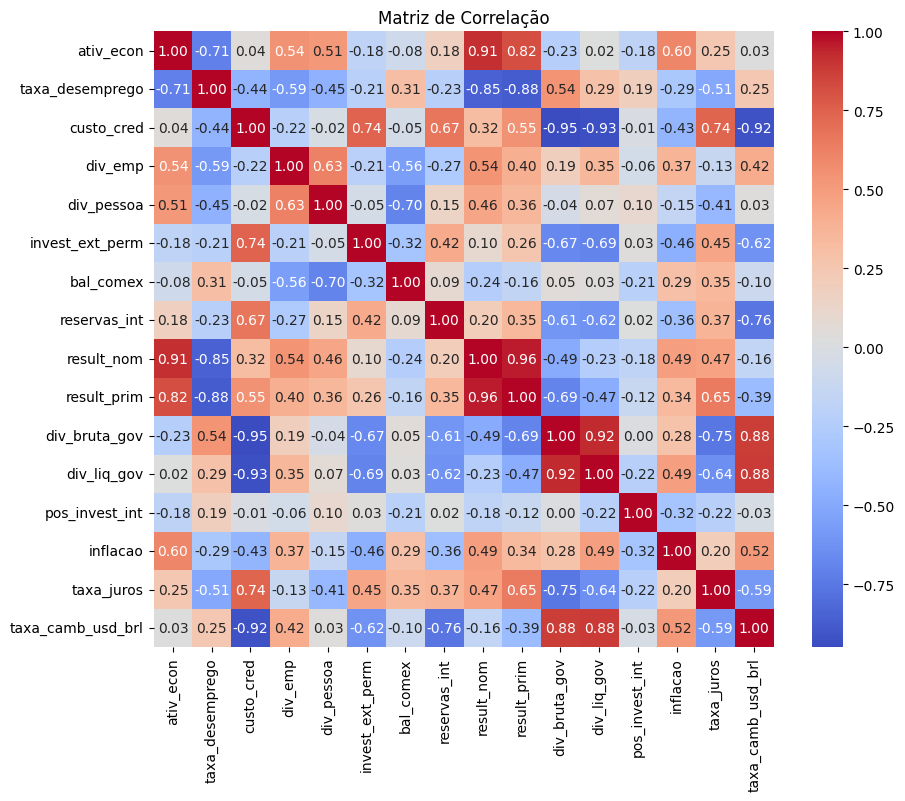

In [ ]:
# Verificação de Possiveis Correlações

'''
Valores e suas respectivas correnpondecias:

r = 0,9 a 1 (positivo ou negativo): correlação muito forte;
r = 0,7 a 09 (positivo ou negativo): correlação forte;
r = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
r = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
r = 0 a 0,3 (positivo ou negativo): não possui correlação.
'''

correlacao = df_periodo.corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))  # Tamanho da figura
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")  # Plotar o heatmap
plt.title("Matriz de Correlação")  # Título do gráfico

# Exibir o gráfico
plt.show()

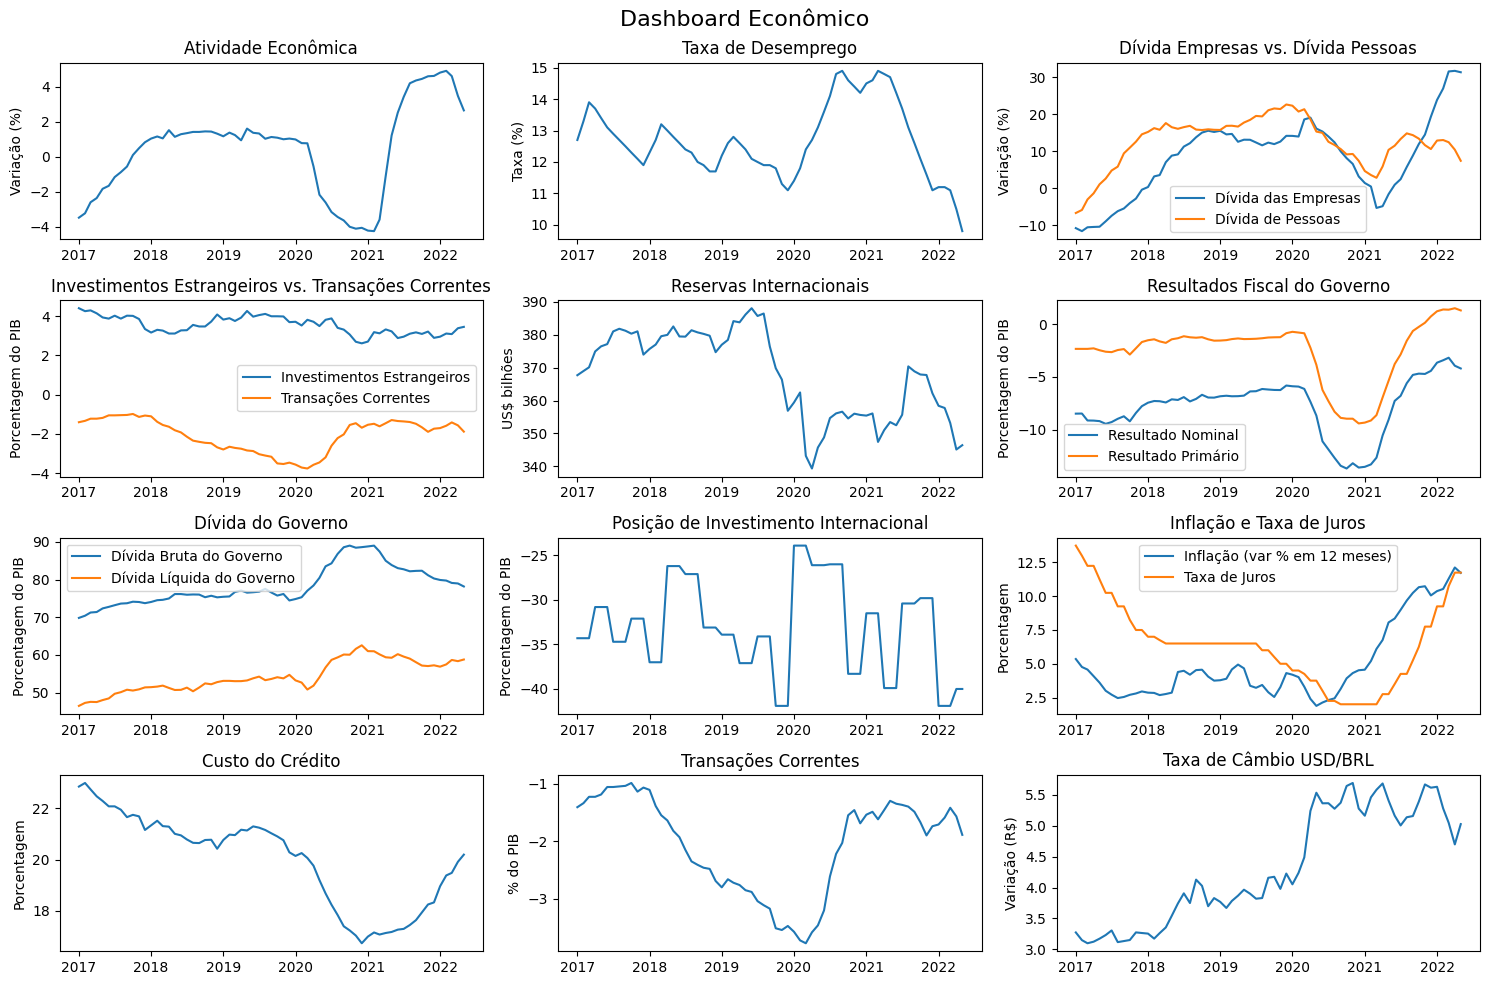

In [ ]:
# Plotagem de graficos para visualização de alguns fatores considerados importantes

# Plotagem de graficos para visualização de alguns fatores considerados importantes

# Ajustando a coluna 'date' para ser interpretada como data completa (ano, mês e dia)
df_periodo['data'] = pd.to_datetime(df_periodo['data'])

# Criando uma nova coluna 'year_month' para agrupar por mês e ano
df_periodo['ano_mes'] = df_periodo['data'].dt.to_period('M')

# Agrupando os dados por mês e ano e calculando as médias mensais para cada variável econômica
df_monthly = df_periodo.groupby('ano_mes').mean().reset_index()

# Criação da figura e dos subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
fig.suptitle('Dashboard Econômico', fontsize=16)

# Gráfico 1: Linha do tempo da Atividade Econômica
axs[0, 0].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['ativ_econ'])
axs[0, 0].set_title('Atividade Econômica')
axs[0, 0].set_ylabel('Variação (%)')

# Gráfico 2: Taxa de Desemprego ao longo do tempo
axs[0, 1].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['taxa_desemprego'])
axs[0, 1].set_title('Taxa de Desemprego')
axs[0, 1].set_ylabel('Taxa (%)')

# Gráfico 3: Comparação entre Dívida das Empresas e Dívida de Pessoas
axs[0, 2].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['div_emp'], label='Dívida das Empresas')
axs[0, 2].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['div_pessoa'], label='Dívida de Pessoas')
axs[0, 2].set_title('Dívida Empresas vs. Dívida Pessoas')
axs[0, 2].set_ylabel('Variação (%)')
axs[0, 2].legend()

# Gráfico 4: Investimentos Estrangeiros vs. Transações Correntes
axs[1, 0].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['invest_ext_perm'], label='Investimentos Estrangeiros')
axs[1, 0].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['bal_comex'], label='Transações Correntes')
axs[1, 0].set_title('Investimentos Estrangeiros vs. Transações Correntes')
axs[1, 0].set_ylabel('Porcentagem do PIB')
axs[1, 0].legend()

# Gráfico 5: Reservas Internacionais Brasileiras
axs[1, 1].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['reservas_int'])
axs[1, 1].set_title('Reservas Internacionais')
axs[1, 1].set_ylabel('US$ bilhões')

# Gráfico 6: Resultados Fiscal do Governo
axs[1, 2].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['result_nom'], label='Resultado Nominal')
axs[1, 2].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['result_prim'], label='Resultado Primário')
axs[1, 2].set_title('Resultados Fiscal do Governo')
axs[1, 2].set_ylabel('Porcentagem do PIB')
axs[1, 2].legend()

# Gráfico 7: Dívida do Governo
axs[2, 0].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['div_bruta_gov'], label='Dívida Bruta do Governo')
axs[2, 0].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['div_liq_gov'], label='Dívida Líquida do Governo')
axs[2, 0].set_title('Dívida do Governo')
axs[2, 0].set_ylabel('Porcentagem do PIB')
axs[2, 0].legend()

# Gráfico 8: Posição de Investimento Internacional
axs[2, 1].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['pos_invest_int'])
axs[2, 1].set_title('Posição de Investimento Internacional')
axs[2, 1].set_ylabel('Porcentagem do PIB')

# Gráfico 9: Inflação e Taxa de Juros
axs[2, 2].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['inflacao'], label='Inflação (var % em 12 meses)')
axs[2, 2].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['taxa_juros'], label='Taxa de Juros')
axs[2, 2].set_title('Inflação e Taxa de Juros')
axs[2, 2].set_ylabel('Porcentagem')
axs[2, 2].legend()

# Gráfico 10: Custo do Crédito ao longo do tempo
axs[3, 0].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['custo_cred'])
axs[3, 0].set_title('Custo do Crédito')
axs[3, 0].set_ylabel('Porcentagem')

# Gráfico 11: Transações Correntes ao longo do tempo
axs[3, 1].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['bal_comex'])
axs[3, 1].set_title('Transações Correntes')
axs[3, 1].set_ylabel('% do PIB')

# Gráfico 12: Taxa de Câmbio USD/BRL ao longo do tempo
axs[3, 2].plot(df_monthly['ano_mes'].dt.to_timestamp(), df_monthly['taxa_camb_usd_brl'])
axs[3, 2].set_title('Taxa de Câmbio USD/BRL')
axs[3, 2].set_ylabel('Variação (R$)')

# Ajuste do layout e exibição do dashboard
plt.tight_layout()
plt.show()

**Dashboard desenvolvido no Looker Studio**

https://lookerstudio.google.com/reporting/a40fd634-dcb9-4e2e-b8e2-8cabf812326b

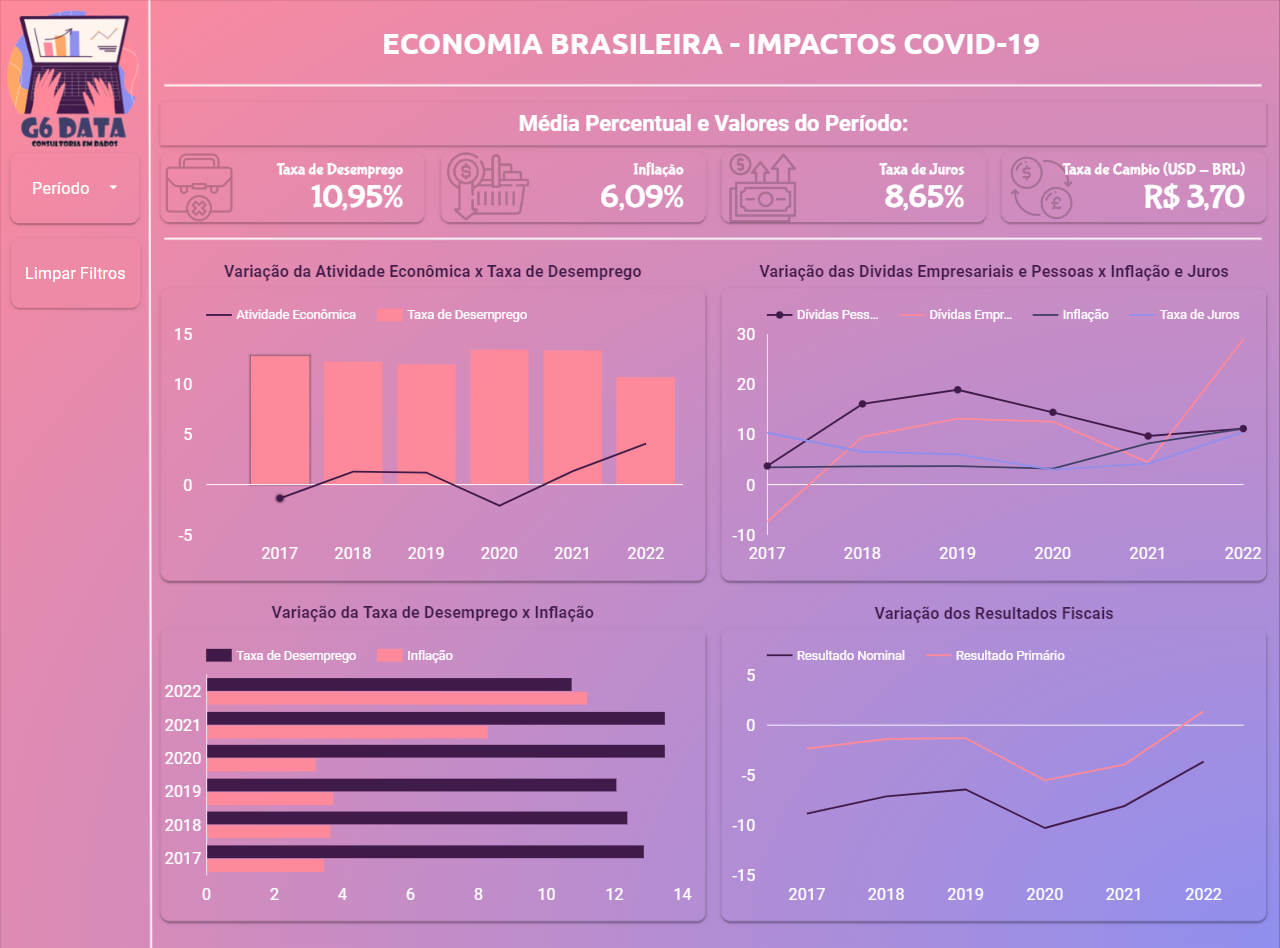

### **Análise SWOT**

**Analise com base nas diferenças médias**

**Forças**:

* **Reservas internacionais elevadas (U$22.68Bi)**: A substancial reserva de divisas representa uma almofada de segurança para a economia, fornecendo proteção contra choques externos, como crises financeiras ou flutuações cambiais.

**Fraquezas**:

* **Dívida bruta e líquida do governo elevadas (-8.00% e -6.58%)**: Essas altas taxas de endividamento governamental podem limitar a flexibilidade fiscal e restringir a capacidade do governo de implementar políticas de estímulo ou investimentos em infraestrutura de longo prazo.

**Oportunidades**:

* **Custo do crédito crescente (3.06%)**: A tendência de aumento nos custos de crédito pode indicar uma fase de maior retorno sobre investimentos, incentivando empresas a realizar projetos de expansão e inovação.

* **Investimentos estrangeiros permanentes em alta (0.55%)**: A atração contínua de investimentos estrangeiros sugere confiança na estabilidade econômica do país, contribuindo para o crescimento econômico sustentável.

* **Resultado nominal e resultado primário positivos (0.77% e 1.99%)**: A obtenção de superávits pode criar oportunidades para reduzir a dívida pública, financiar projetos sociais e promover o crescimento econômico de maneira mais sustentável.

**Ameaças**:

* **Atividade econômica em queda (-0.02%)**: A desaceleração econômica pode levar a uma redução na produção, diminuição do emprego e menor crescimento do PIB, impactando negativamente o bem-estar geral.

* **Taxa de desemprego elevada (-0.59%)**: O aumento da taxa de desemprego pode resultar em pressões sociais e redução do poder de compra da população, afetando a demanda agregada e a estabilidade econômica.

* **Inflação negativa (-3.07%)**: A deflação pode criar um ambiente de baixa demanda, inibindo os gastos dos consumidores e afetando a lucratividade das empresas.

* **Taxa de câmbio USD/BRL em queda (R$-1.64)**: A desvalorização da moeda nacional em relação ao dólar pode aumentar os custos de importação e potencialmente conduzir à inflação, afetando a competitividade das exportações.

## **Observações Gerais**

### **Indicativo de possiveis causas das correlações fortes ou muitos fortes**


**ativ_econ x taxa_desemprego (inverso)**:

* Isso sugere que quando a atividade econômica aumenta, a taxa de desemprego tende a diminuir, e vice-versa. Isso pode ocorrer porque uma atividade econômica mais forte geralmente resulta em mais oportunidades de emprego.

**ativ_econ x result_nom**:

* Indica que um aumento na atividade econômica está associado a um aumento no resultado nominal em termos percentuais do PIB. Uma economia mais forte pode gerar mais receitas e, consequentemente, um maior resultado nominal.

**ativ_econ x result_prim**:

* Indica que um aumento na atividade econômica está associado a um aumento no resultado primário em termos percentuais do PIB. Uma economia mais robusta pode levar a maiores receitas fiscais e menor necessidade de gastos públicos em relação ao PIB.

**taxa_desemprego x result_nom (inverso)**:

* Isso significa que quando a taxa de desemprego diminui, o resultado nominal tende a aumentar. Isso pode ocorrer porque menos desemprego geralmente resulta em mais pessoas empregadas, contribuindo para a atividade econômica e as receitas fiscais.

**taxa_desemprego x result_prim (inverso)**:

* Isso sugere que quando a taxa de desemprego diminui, o resultado primário tende a aumentar. Menos desemprego pode levar a uma base tributária mais forte e a menores despesas com programas de seguridade social.

**custo_cred x invest_ext_perm**:

* Isso indica que um aumento no custo do crédito está associado a um aumento nos investimentos estrangeiros permanentes. Isso pode ocorrer porque taxas de juros mais altas podem atrair investidores estrangeiros em busca de retornos mais elevados.

**custo_cred x reservas_int**:

* Isso sugere que um aumento no custo do crédito está associado a um aumento nas reservas internacionais. Isso pode ocorrer porque o aumento do custo do crédito pode levar o governo a acumular mais reservas para enfrentar eventuais crises financeiras.

**custo_cred x div_bruta_gov (inverso)**:

* Isso significa que um aumento no custo do crédito está associado a uma diminuição da dívida bruta do governo. Isso pode ocorrer porque maiores custos de empréstimo podem levar o governo a adotar políticas de austeridade fiscal.

**custo_cred x div_liq_gov (inverso)**:

* Isso sugere que um aumento no custo do crédito está associado a uma diminuição da dívida líquida do governo. Custos de empréstimo mais altos podem incentivar o governo a reduzir sua dívida.

**custo_cred x taxa_juros**:

* Indica que um aumento no custo do crédito está associado a um aumento nas taxas de juros. Isso é intuitivo, pois o custo do crédito geralmente está relacionado às taxas de juros cobradas.

**custo_cred x taxa_camb_usd_brl (inverso)**:

* Isso sugere que um aumento no custo do crédito está associado a uma diminuição na taxa de câmbio USD/BRL. Isso pode ocorrer porque um aumento no custo do crédito pode levar a uma menor demanda por empréstimos em moeda estrangeira.

**div_pessoa x bal_comex (inverso)**:

* Isso significa que um aumento na dívida das pessoas está associado a uma diminuição nas transações correntes em relação ao PIB. Isso pode acontecer porque um aumento da dívida das pessoas pode afetar negativamente o consumo e as importações.

**reservas_int x taxa_camb_usd_brl**:

* Isso sugere que um aumento nas reservas internacionais está associado a um aumento na taxa de câmbio USD/BRL. Maior quantidade de reservas internacionais pode fortalecer a moeda local.

**div_bruta_gov x taxa_juros (inverso)**:

* Isso indica que um aumento na dívida bruta do governo está associado a uma diminuição nas taxas de juros. Isso pode ocorrer porque uma alta dívida do governo pode levar ao aumento da demanda por títulos do governo, o que pode pressionar as taxas de juros para baixo.

**div_bruta_gov x taxa_camb_usd_brl**:

* Isso sugere que um aumento na dívida bruta do governo está associado a um aumento na taxa de câmbio USD/BRL. Maior dívida do governo pode afetar negativamente a confiança dos investidores na moeda local.

**div_liq_gov x taxa_camb_usd_brl**:

* Isso sugere que um aumento na dívida líquida do governo está associado a um aumento na taxa de câmbio USD/BRL. Maior dívida líquida do governo pode impactar a confiança na moeda local e afetar a taxa de câmbio.

### **Possiveis Causas e Soluções**


**Atividade Econômica (ativ_econ)**:
* Causa Possível: A queda na atividade econômica pode ser atribuída às restrições de bloqueio, fechamento de empresas e diminuição da demanda devido à incerteza econômica gerada pela pandemia.
* Solução Possível: Estímulos fiscais, políticas de apoio às empresas e medidas de reabertura segura podem ajudar a estimular a atividade econômica.


**Taxa de Desemprego (taxa_desemprego)**:
* Causa Possível: A redução na atividade econômica e o fechamento de empresas levaram a uma alta taxa de desemprego.
* Solução Possível: Programas de proteção ao emprego, treinamento para habilidades emergentes e investimentos em setores impulsionadores de empregos podem ajudar a reduzir o desemprego.


**Custo do Crédito (custo_cred)**:
* Causa Possível: A incerteza econômica pode ter levado a um aumento no custo do crédito, já que os credores buscaram mitigar riscos.
* Solução Possível: Políticas de flexibilização monetária, redução das taxas de juros e incentivos para empréstimos podem reduzir o custo do crédito.


**Dívida das Empresas (div_emp)**:
* Causa Possível: A queda na atividade econômica pode ter impactado negativamente a capacidade das empresas de gerar receita para pagar suas dívidas.
* Solução Possível: Programas de renegociação de dívidas, apoio financeiro direto às empresas e estímulo à recuperação econômica podem ajudar a aliviar a carga da dívida das empresas.


**Dívida de Pessoas (div_pessoa)**:
* Causa Possível: Perda de empregos e renda podem ter levado a um aumento na dívida das pessoas.
* Solução Possível: Apoio financeiro direto às famílias, programas de alívio da dívida pessoal e incentivos ao emprego podem ajudar a reduzir a dívida das pessoas.


**Investimentos Estrangeiros (invest_ext_perm)**:
* Causa Possível: A incerteza econômica global durante a pandemia pode ter afetado os investimentos estrangeiros.
* Solução Possível: Melhoria do ambiente de negócios, incentivos fiscais para investidores estrangeiros e promoção de investimentos em setores estratégicos podem atrair investimentos.


**Transações Correntes (bal_comex)**:
* Causa Possível: A queda na demanda global e interrupções nas cadeias de suprimentos podem ter afetado as transações comerciais.
* Solução Possível: Diversificação das exportações, estímulo ao comércio regional e adaptação às mudanças nas cadeias de suprimentos podem melhorar o balanço comercial.


**Reservas Internacionais (reservas_int)**:
* Causa Possível: Instabilidades econômicas globais podem ter levado a um aumento nas reservas internacionais como medida de proteção.
* Solução Possível: Diversificação das reservas, busca de acordos comerciais estáveis e fortalecimento das parcerias internacionais podem ajudar a administrar as reservas.


**Resultado Nominal (result_nom)**:
* Causa Possível: Mudanças nas receitas e despesas do governo devido à pandemia podem ter impactado o resultado nominal.
* Solução Possível: Controle rigoroso das despesas, estímulo às receitas fiscais e gestão eficiente dos gastos públicos podem melhorar o resultado nominal.


**Resultado Primário (result_prim)**:
* Causa Possível: Variações no resultado primário podem refletir mudanças na política fiscal durante a pandemia.
* Solução Possível: Melhoria na eficiência da gestão fiscal, foco na redução de gastos desnecessários e aumento de receitas podem ajudar a alcançar um resultado primário mais equilibrado.


**Dívida Bruta do Governo (div_bruta_gov)**:
* Causa Possível: Aumento da dívida pública pode estar relacionado a gastos extraordinários do governo durante a pandemia.
* Solução Possível: Controle dos gastos públicos, busca de fontes alternativas de financiamento e políticas de crescimento econômico sustentável podem ajudar a reduzir a dívida bruta do governo.


**Dívida Líquida do Governo (div_liq_gov)**:
* Causa Possível: Mudanças na dívida líquida podem refletir tanto a variação na dívida bruta quanto a performance econômica.
* Solução Possível: Estratégias de gestão da dívida, políticas de austeridade responsável e estímulo ao crescimento econômico podem influenciar positivamente a dívida líquida do governo.


**Posição de Investimento Internacional (pos_invest_int)**:
* Causa Possível: Flutuações nas posições de investimento podem ser influenciadas pela volatilidade dos mercados globais.
* Solução Possível: Diversificação dos investimentos internacionais, monitoramento constante dos mercados financeiros e adaptação às tendências econômicas globais podem melhorar a posição de investimento internacional.


**Inflação (inflacao)**:
* Causa Possível: A queda na demanda e interrupções nas cadeias de suprimentos podem ter contribuído para a queda na inflação.
* Solução Possível: Políticas de estímulo à demanda, monitoramento da inflação e intervenções pontuais podem ajudar a estabilizar a taxa de inflação.


**Taxa de Juros (taxa_juros)**:
* Causa Possível: A taxa de juros pode ter sido ajustada em resposta à política monetária para estimular ou conter a atividade econômica.
* Solução Possível: Flexibilização ou aperto da política monetária, dependendo das condições econômicas, podem ajudar a manter a estabilidade financeira.


**Taxa de Câmbio USD/BRL (taxa_camb_usd_brl)**:
* Causa Possível: A taxa de câmbio pode ter sido influenciada por fluxos de capital, mudanças na demanda por moeda estrangeira e políticas cambiais.
* Solução Possível: Intervenções cambiais, monitoramento do mercado de câmbio e políticas para atrair investimentos podem ajudar a estabilizar a taxa de câmbio.